In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

In [49]:
np.random.seed(42)
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.8 * X ** 2 + X + 2 + np.random.randn(m, 1)

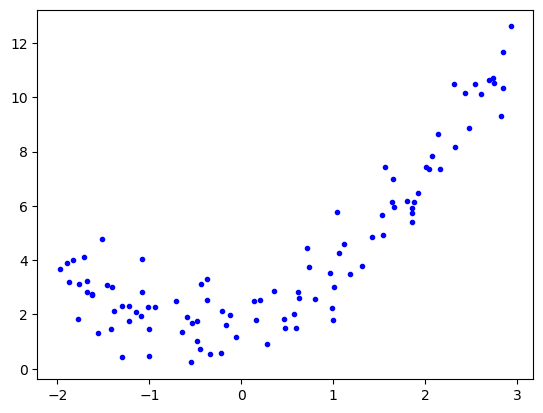

In [50]:
plt.plot(X, y, 'b.');

In [68]:
X_new = np.linspace(-2, 3, 100).reshape(100, 1)

In [52]:
y_new = 0.8 * X_new ** 2 + X_new + 2 + np.random.randn(m, 1)

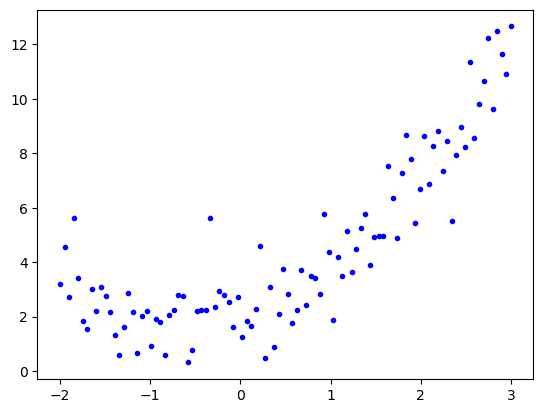

In [53]:
plt.plot(X_new, y_new, 'b.');

In [54]:
class PolynomialRegressor:
    def __init__(self, degree, epochs, learning_rate):
        self.degree = degree
        self.epochs = epochs
        self.lr = learning_rate
        self.coef_ = None
        self.intercept_ = 0

    def fit(self, X, y):
        poly_features = PolynomialFeatures(self.degree, include_bias=False)
        X_poly = poly_features.fit_transform(X)
        self.coef_ = 1
        for i in range(self.epochs):
            for j in range(X.shape[0]):
                index = np.random.randint(0, X.shape[0] - 1)
                y_pred = np.sum(self.coef_ * X_poly[index]) + self.intercept_
                gradient_i = (-2) * ((y[index] - y_pred) * X_poly[index])
                self.coef_ -= (self.lr * gradient_i)
                gradient_o = (-2) * (y[index] - y_pred)
                self.intercept_ -= (self.lr * gradient_o)
        return self

    def predict(self, X):
        return (self.coef_ @ X.T) + self.intercept_

In [55]:
poly_reg = PolynomialRegressor(2, 10, 0.01)

In [56]:
poly_reg.fit(X, y)

In [57]:
y.shape

(100, 1)

In [58]:
X.shape

(100, 1)

In [59]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [60]:
X_new = poly_features.fit_transform(X)

In [61]:
poly_pred = poly_reg.predict(X_new)

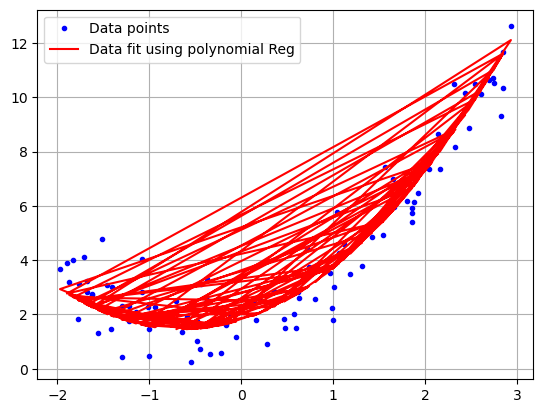

In [93]:
plt.plot(X, y, 'b.', label="Data points")
plt.plot(X, poly_pred, 'r-', label="Data fit using polynomial Reg")
plt.legend()
plt.grid();

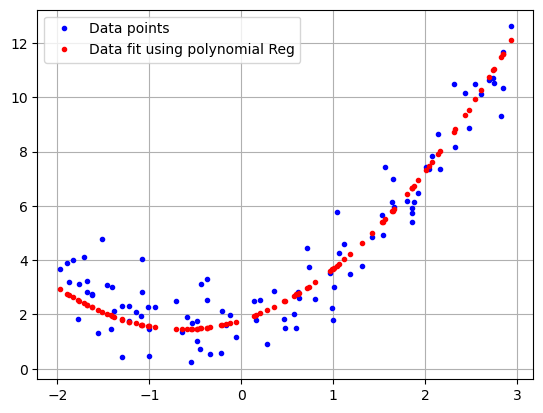

In [94]:
plt.plot(X, y, 'b.', label="Data points")
plt.plot(X, poly_pred, 'r.', label="Data fit using polynomial Reg")
plt.legend()
plt.grid();

In [70]:
lr = LinearRegression()

In [76]:
np.random.seed(42)
X_new = np.linspace(-2, 3, 100).reshape(100, 1)
y_new = 0.8 * X_new ** 2 + X_new + 2 + np.random.randn(m, 1)

In [78]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [79]:
X_new_poly = poly.fit_transform(X_new)

In [80]:
lr.fit(X_new_poly, y_new)

LinearRegression()

In [81]:
lr_pred = lr.predict(X_new_poly)

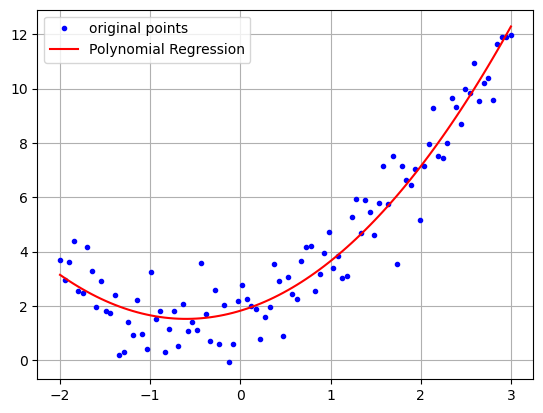

In [90]:
plt.plot(X_new, y_new, 'b.', label="Data points")
plt.plot(X_new, lr_pred, 'r-', label="Polynomial Regression");
plt.legend()
plt.grid();